# SEABORN

In [1]:
# Generamos un dataset artificial
import string
import numpy as np
import pandas as pd

letters = ['TRIAL', 'ESTANDAR', 'PREMIUM']
cuenta = [np.random.choice(letters) for i in range(0, 100)]
valores = np.random.randn(100)
acceso = np.random.randint(10, 100, 100)

usuarios = pd.DataFrame({
    'TIPO_CUENTA': cuenta,
    'VALOR_CUENTA': valores,
    'ACCESO_CUENTA': acceso
})

usuarios.head()

,TIPO_CUENTA,VALOR_CUENTA,ACCESO_CUENTA
0,PREMIUM,-1.100046,58
1,ESTANDAR,1.210527,53
2,ESTANDAR,-0.891444,48
3,PREMIUM,-1.089125,52
4,PREMIUM,-0.296587,48


In [2]:
usuarios.describe()

,VALOR_CUENTA,ACCESO_CUENTA
count,100.000000,100.000000
mean,0.110160,52.420000
std,0.969290,25.388369
min,-2.714423,11.000000
25%,-0.540157,28.750000
50%,0.053935,54.500000
75%,0.747678,70.250000
max,2.232753,99.000000


In [3]:
(usuarios.TIPO_CUENTA.value_counts() / len(usuarios)) * 100

PREMIUM     39.0
TRIAL       33.0
ESTANDAR    28.0
Name: TIPO_CUENTA, dtype: float64

**Seaborn** actúa como un interfaz de alto nivel sobre **Matplotlib** para visualización de datos, se especializa en realizar gráficas de forma más sencilla y con necesidad de menos código que con Matplotlib.

La especialidad de esta librería se basa en la generación de gráficos estadísticos, aunque, las principales funcionalidades que podemos encontrarnos son:
* Una API orientada a encontrar las relaciones entre múltiples variables de un dataset.
* Gran soporte dedicado a variables categóricas para mostrar sus estadísticas.
* Capacidad de comparar diferentes tipos de distribuciones.
* Estimación y visualización automática de regresión lineal.
* Posibilidad de obtener los múltiples facets de una variable.

NOTA: Se recomienda tener importado Pandas para poder realizar operaciones sobre los datasets además de visualización. También se recomienda siempre trabajar junto con pyplot

Importamos las librerías

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

Lo primero que vamos a hacer es mostrar la simplicidad de seaborn a través de un gráfico de nube de puntos y su regresión lineal. Esta acción la realizamos con una única función <code>**lmplot**</code>, los parámetros principales que necesitará la fucnión son **x**, **y**, **data**

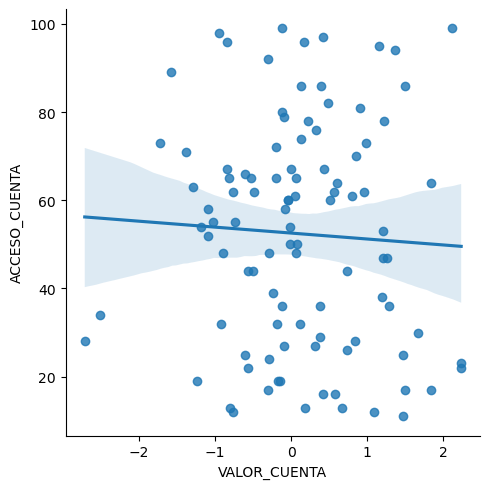

In [5]:
sns.lmplot(x="VALOR_CUENTA", y = 'ACCESO_CUENTA', data = usuarios)

Una de las curiosidades de Seaborn es que, al ser de alto nivel, integra varias funciones al mismo tiempo, en la gráfica anterior vemos 3, nube de puntos, línea de ajuste y el smooth, no obstante, para pintar solamente una nube de puntos, tenemos que desactivar parámetros, en este caso **fit_reg** toma valores True o False, lo desactivamos.

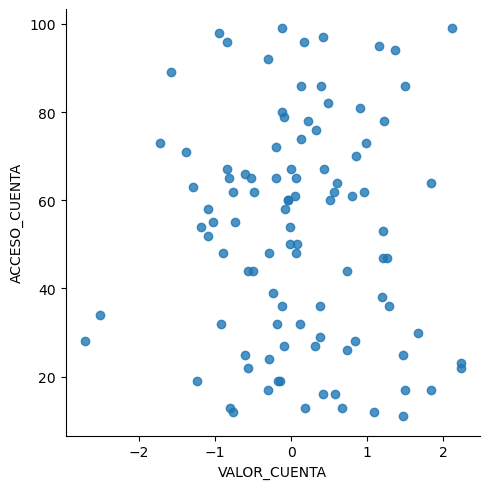

In [6]:
sns.lmplot(x="VALOR_CUENTA", y = 'ACCESO_CUENTA', 
           data = usuarios, fit_reg=False)

De un modo similar a ggplot, podemos mostrar el color de la gráfica en función de otra varaible, en este caso, vamos a mostrar el color por los 3 niveles de la variable TIPO_CUENTA, para mostrar el color utilizamos el parámetro **hue**

C:\Users\pere_\anaconda3\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


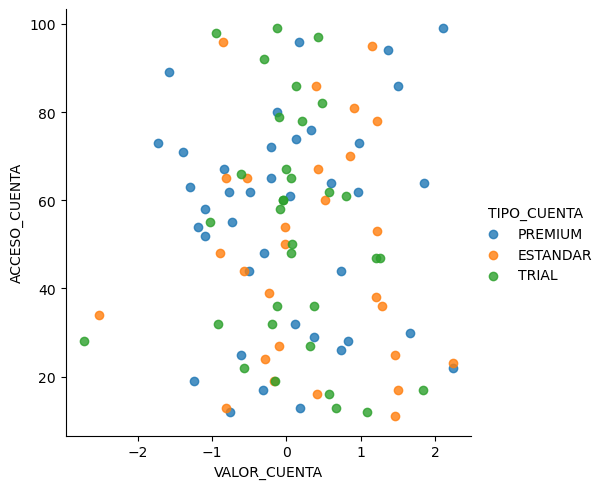

In [7]:
sns.lmplot(x="VALOR_CUENTA", y = 'ACCESO_CUENTA', 
           data = usuarios, hue = 'TIPO_CUENTA', 
           fit_reg=False, legend=True, legend_out=True)

### Pregunta.

Si ahora en la visualización anterior, volvemos a gregar `fit_reg=True`, ¿Cómo se realizará la regresión lineal?

Algunos tipos de gráfico, no toman parámetros obligatorios x e y, por lo que podemos pasar todo el dataset completo.

<Axes: >

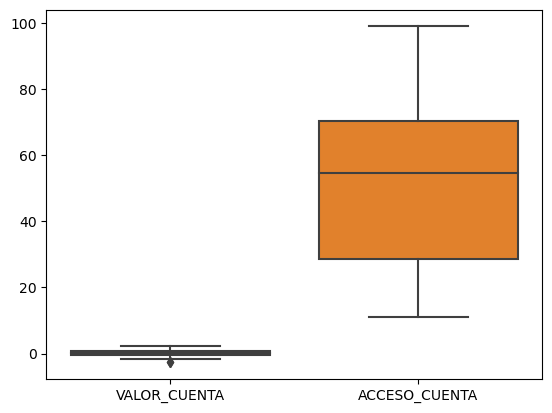

In [8]:
sns.boxplot(data=usuarios)

<Axes: >

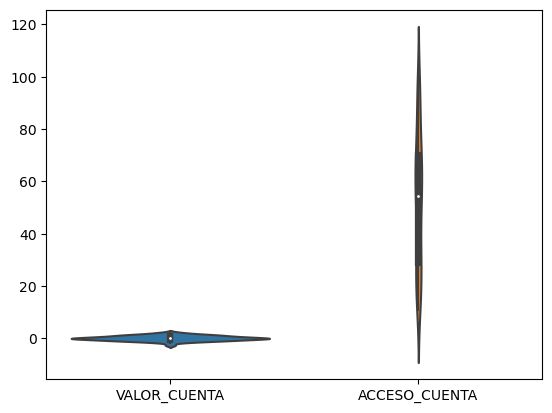

In [9]:
sns.violinplot(data=usuarios)

No obstante, podemos siempre definir los conjuntos de datos que queremos mostrar en la gráfica.

<Axes: xlabel='TIPO_CUENTA', ylabel='VALOR_CUENTA'>

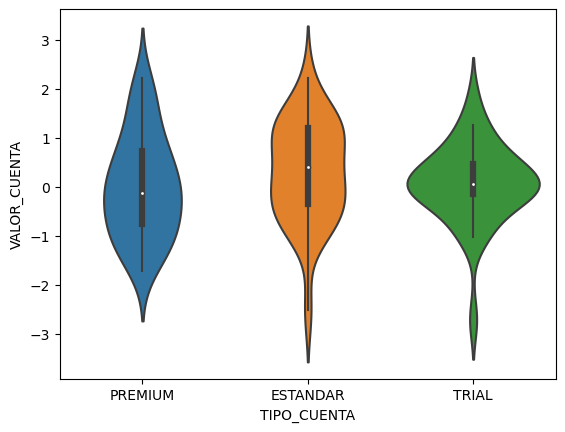

In [10]:
sns.violinplot(x=usuarios.TIPO_CUENTA, 
               y=usuarios.VALOR_CUENTA, 
               data=usuarios)

También podemos definir un tipo de colores propio. Simplemente tenemos que pasar una lista con los valores al parámetro **palette**

<Axes: xlabel='TIPO_CUENTA', ylabel='VALOR_CUENTA'>

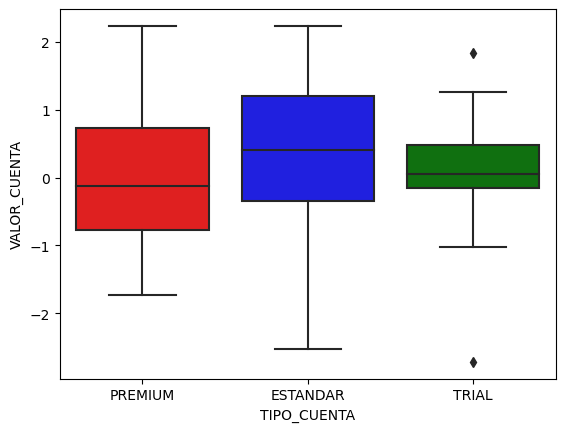

In [11]:
sns.boxplot(x=usuarios.TIPO_CUENTA, 
            y=usuarios.VALOR_CUENTA, 
            data=usuarios,
            palette=['red', 'blue', 'green'])

Una característica muy importante de Seaborn es que nos permite solapar gráficas entre sí, vamos a utilizar nuestro anterior boxplot y añadiremos otro tipo de gráfica que muestra la dispersión de los puntos reflejando la estructura de un boxplot, utilizaremos <code>**swarmplot**</code>

<Axes: xlabel='TIPO_CUENTA', ylabel='VALOR_CUENTA'>

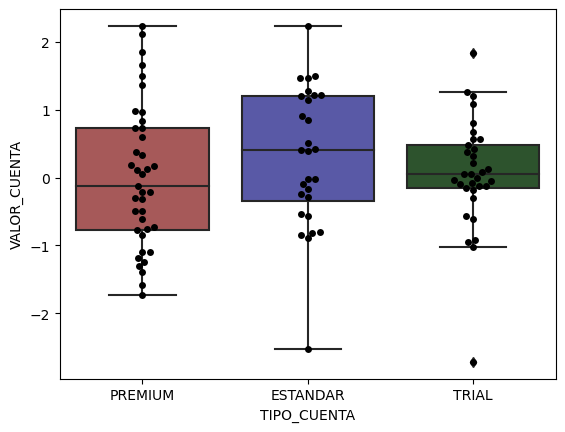

In [12]:
sns.boxplot(x=usuarios.TIPO_CUENTA, 
            y=usuarios.VALOR_CUENTA, 
            data=usuarios,
            palette=['red', 'blue', 'green'],
            saturation=0.3)

sns.swarmplot(x=usuarios.TIPO_CUENTA, 
              y=usuarios.VALOR_CUENTA, 
              data=usuarios, 
              color='k')

Algunos colores que podemos utilizar en Seaborn: https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

<Axes: xlabel='TIPO_CUENTA', ylabel='VALOR_CUENTA'>

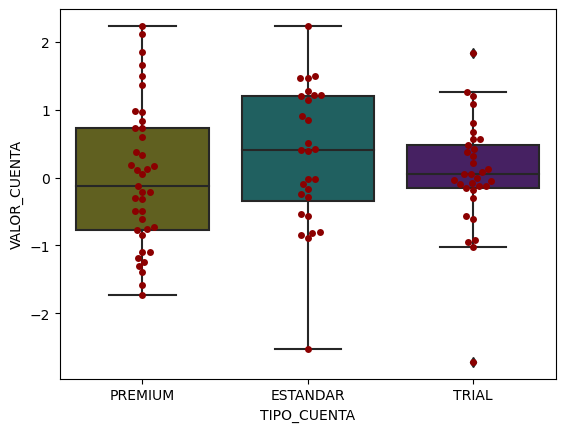

In [13]:
sns.boxplot(x=usuarios.TIPO_CUENTA, 
            y=usuarios.VALOR_CUENTA, 
            data=usuarios,
            palette=['olive', 'teal', 'indigo'],
            saturation=0.5)

sns.swarmplot(x=usuarios.TIPO_CUENTA, 
              y=usuarios.VALOR_CUENTA, 
              data=usuarios, 
              color='darkred')

Podemos añadir títulos y texto para los ejes x e y del mismo modo que con pyplot.

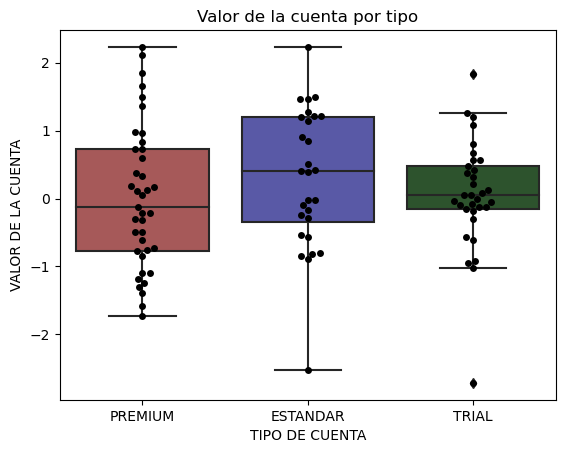

In [14]:
sns.boxplot(x=usuarios.TIPO_CUENTA, 
            y=usuarios.VALOR_CUENTA, 
            data=usuarios,
            palette=['red', 'blue', 'green'],
            saturation=0.3)

sns.swarmplot(x=usuarios.TIPO_CUENTA, 
              y=usuarios.VALOR_CUENTA, 
              data=usuarios, 
              color='k')

plt.title('Valor de la cuenta por tipo')
plt.xlabel('TIPO DE CUENTA')
plt.ylabel('VALOR DE LA CUENTA')
plt.show()

Tal y como hemos mencionado anteriormente, al ser una librería de alto nivel integra diferentes operaciones sobre una misma gráfica. Veremos en el siguiente ejemplo con <code>**histplot**</code> como realizar sin esfuerzo un histograma.

C:\Users\pere_\AppData\Local\Temp\ipykernel_9516\4170675517.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=usuarios.VALOR_CUENTA, color='blue')


<Axes: xlabel='VALOR_CUENTA', ylabel='Density'>

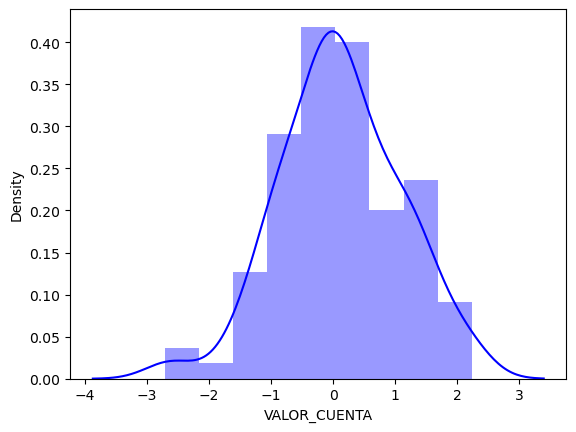

In [15]:
sns.distplot(a=usuarios.VALOR_CUENTA, color='blue')

Otra característica de Seaborn es poder representar gráficamente de una forma sencilla la frecuenica de las variables con <code>**countplot**</code>

<Axes: xlabel='TIPO_CUENTA', ylabel='count'>

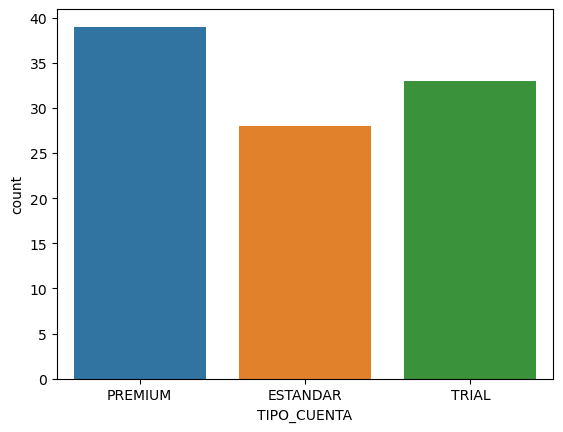

In [16]:
sns.countplot(x='TIPO_CUENTA', data=usuarios)

Al igual que con ggplot, también podemos realizar *faceting* y mostrar sub-gráficas por cada valor de una variable, ya sea categórica o numérica. La función encargada para realizar esta acción es <code>**catplot**</code>

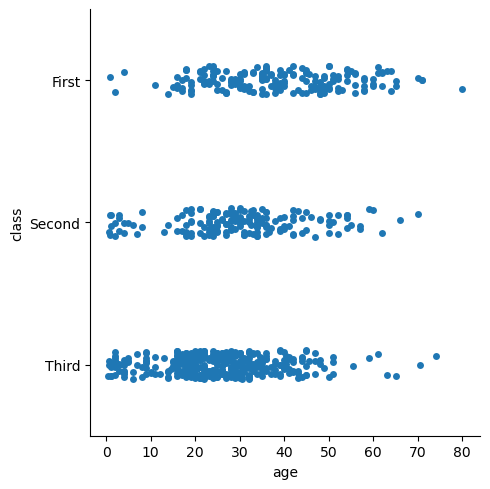

In [17]:
df = sns.load_dataset("titanic")
sns.catplot(data=df, x="age", y="class")

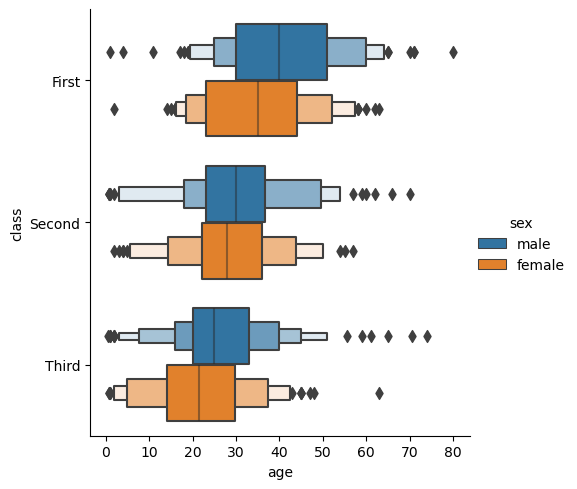

In [18]:
sns.catplot(data=df, x="age", y="class", hue="sex", kind="boxen")

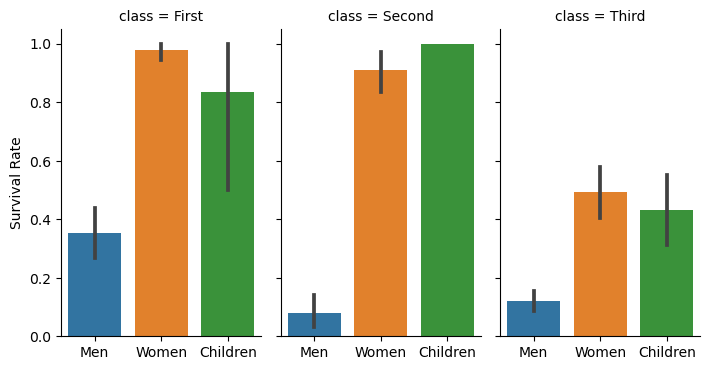

In [19]:
g = sns.catplot(
    data=df, x="who", y="survived", col="class",
    kind="bar", height=4, aspect=.6,
)
g.set_axis_labels("", "Survival Rate")
g.set_xticklabels(["Men", "Women", "Children"])

Otra característica importante también mencionada al principio del contenido, es que Seaborn está integrado con varias funciones de pandas, en este caso, realizaremos una visualización en base a una matriz de correlación con <code>**heatmap**</code>.

Como tenemos muy pocas variables numéricas en nuestro dataset, vamos a generar algunas más.

Nota: Se recomieda ver el siguiente enlace para conocer los diferentes mapas de colores con: https://matplotlib.org/3.2.0/tutorials/colors/colormaps.html

In [20]:
new_df = usuarios.copy()

new_df['SQUARE'] = new_df.VALOR_CUENTA**2
new_df['CUBIC'] = new_df.VALOR_CUENTA**3
new_df['NEW_INTS_1'] = np.random.randint(10, 100, 100)
new_df['NEW_INTS_2'] = np.random.randint(10, 100, 100)

C:\Users\pere_\AppData\Local\Temp\ipykernel_9516\3085812523.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.corr(), cmap='Greys')


<Axes: >

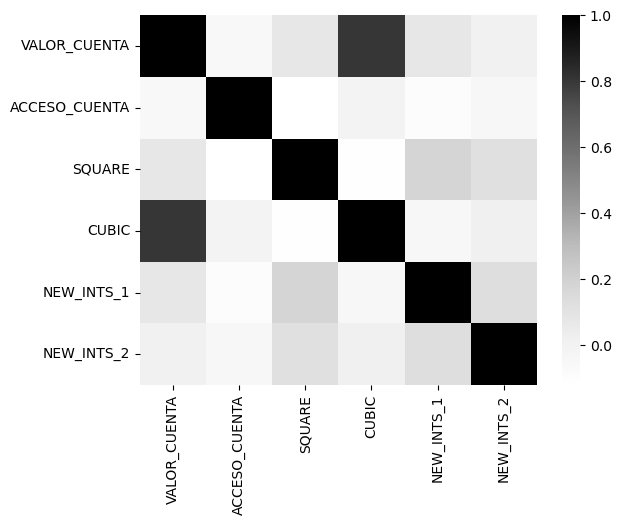

In [21]:
sns.heatmap(new_df.corr(), cmap='Greys')

Seaborn también dispone de la opción de realizar diagramas *pairs* o matrices de visualización, la función encargada de ello es <code>**pairplot**</code>

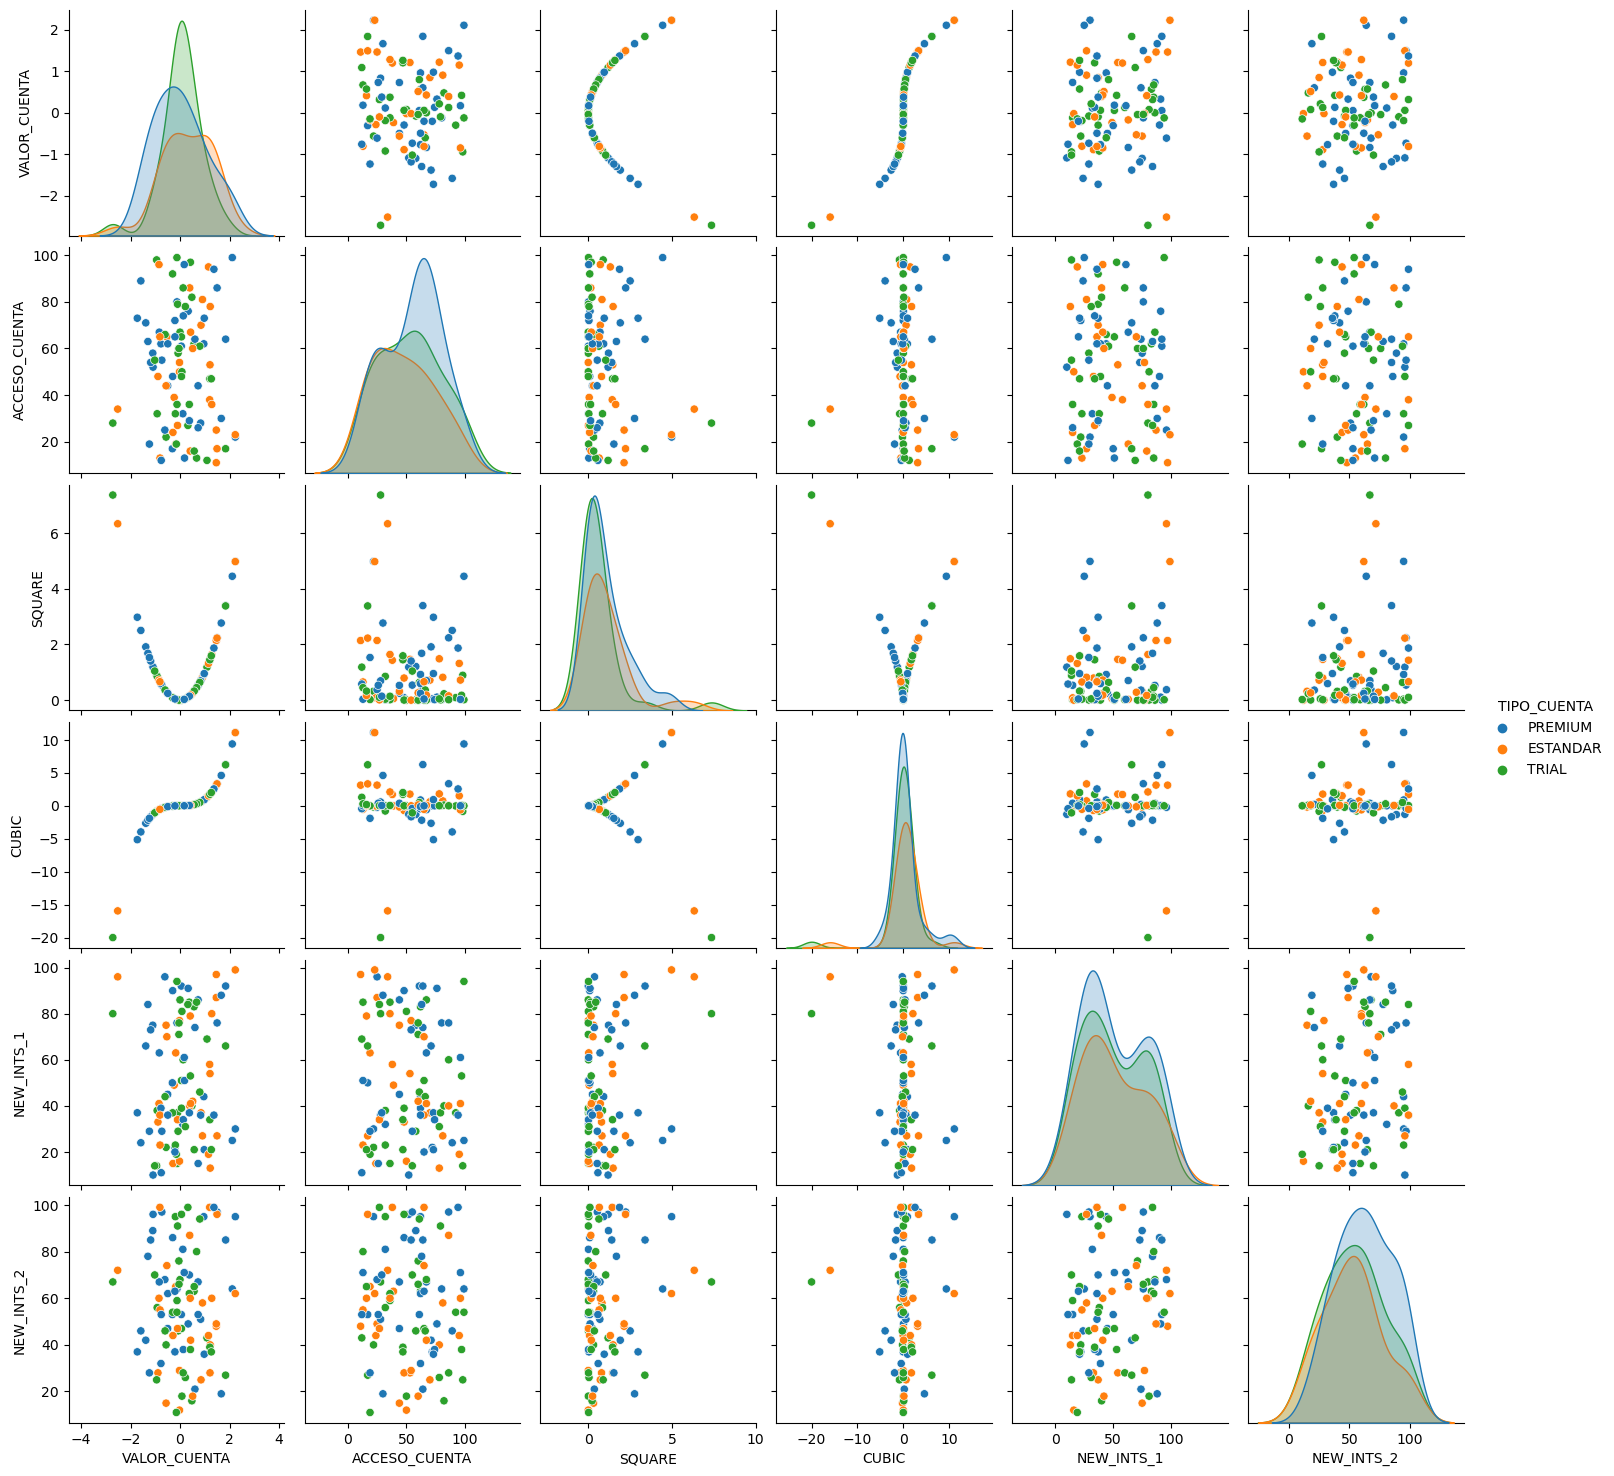

In [22]:
sns.pairplot(data=new_df, hue='TIPO_CUENTA')

Finalmente, mostraremos cómo realizar gráficos conjuntos, es decir, por una parte mostrar una nube de puntos entre dos variables y, al mismo tiempo estar mostrando sus distribuciones. Para este tipo de visualización, disponemos de <code>**joinplot**</code>

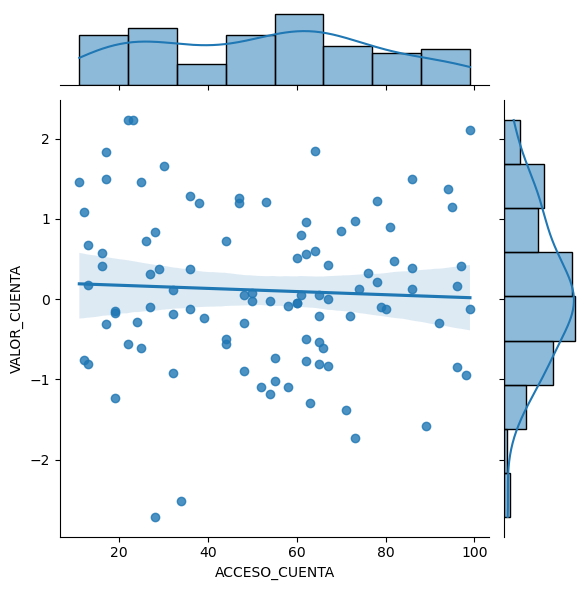

In [23]:
sns.jointplot(x='ACCESO_CUENTA', y='VALOR_CUENTA', data=new_df, kind='reg')

En caso de que tengamos datos históricos podemos representarlos con `lineplot`

In [24]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [25]:
flights_wide = flights.pivot("year", "month", "passengers")
flights_wide.head()

C:\Users\pere_\AppData\Local\Temp\ipykernel_9516\1230890992.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights_wide = flights.pivot("year", "month", "passengers")


month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


<Axes: xlabel='year'>

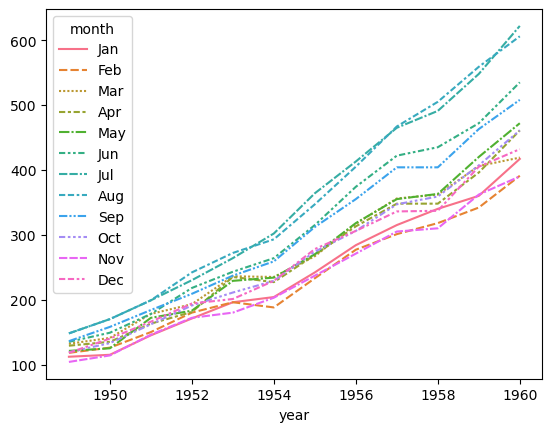

In [26]:
sns.lineplot(data=flights_wide)

<Axes: xlabel='year', ylabel='passengers'>

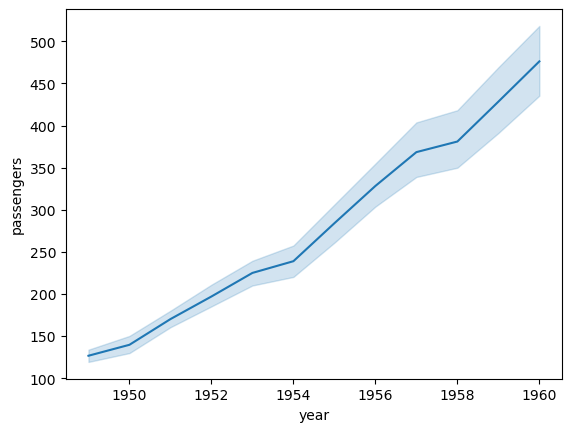

In [27]:
sns.lineplot(data=flights, x="year", y="passengers")